<a href="https://colab.research.google.com/github/RajaPalam/RajaCoursera_DataScienceLearning/blob/main/Lung_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install opencv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import sklearn
import seaborn as sns
import pandas as pd


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
# File Directory for both the train and test
train_path = "/content/drive/MyDrive/RajaProject/Lung_CT/train"
test_path = "/content/drive/MyDrive/RajaProject/Lung_CT/test"

In [5]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n","\n\n",test_set)

{'0': 856, '3': 841, '2': 509, '1': 798} 

 

 {'3': 20, '2': 53, '1': 26, '0': 30}


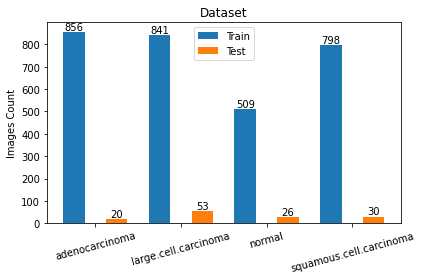

In [6]:
#!pip install matplotlib --upgrade
labels = ['adenocarcinoma','large.cell.carcinoma', 'normal','squamous.cell.carcinoma']
train_list = list(train_set.values())
#val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
#rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
#ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

## Importing Keras for Image Classification

In [7]:

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten

In [8]:
# generate training,testing and validation batches 

                                                
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip = True,
                                 validation_split= 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                batch_size = 32,
                                                shuffle =True,
                                                target_size = (128,128),
                                                class_mode = 'categorical',
                                                subset = 'training'  )

Found 2405 images belonging to 4 classes.


In [9]:
train_data.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

In [10]:
#val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 32,
                                                   target_size =(128,128),
                                                     shuffle=True,
                                                   class_mode = 'categorical',
                                                   subset = "validation")

Found 599 images belonging to 4 classes.


In [11]:
val_data.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

In [12]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                             shuffle = True,
                                                   target_size = (128,128),
                                                   class_mode = 'categorical')

Found 129 images belonging to 4 classes.


In [13]:
test_data.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

## CNN Model

In [14]:
# model = Sequential() 

# model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(128,128,3)) )
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu' ))
# model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu' ))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=480, kernel_size=(3,3), activation='relu' ))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))


# model.add(Dropout(rate=0.25))
# # model.add(Flatten())
# model.add(Dense(units=300, activation='relu'))
# model.add(Dropout(rate=0.25))
# model.add(Dense(units=4, activation='softmax'))
 
# model.summary()

In [15]:
# model = Sequential()
# model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Flatten())
# model.add(Dense(units = 128 , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 4 , activation = 'sigmoid'))
# model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
# model.summary()

In [16]:
# #currently running  model
# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape = (128,128,3)))

# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(16))
# model.add(Dense(4, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

In [17]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

In [18]:
# #currently running model
# model = Sequential() 

# model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(128,128,3)) )

# # model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.25))

# model.add(Flatten())
# model.add(Dense(units=64, activation='relu'))
# model.add(Dropout(rate=0.25))
# model.add(Dense(units=4, activation='sigmoid'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
# model.summary()

In [19]:
# model = keras.Sequential()
# model.add(layers.Conv2D(filters=32, kernel_size=(11, 11), 
#                         strides=(4, 4), activation="relu", 
#                         input_shape=(64, 64, 3)))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
# model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
# model.add(layers.Conv2D(filters=96, kernel_size=(3, 3), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(300, activation="relu"))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(4, activation="softmax"))
# model.compile(loss='categorical_crossentropy', 
#               optimizer=tf.optimizers.SGD(lr=0.001), 
#               metrics=['accuracy'])
# model.summary()

In [20]:
# Currently Using

In [21]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu',   input_shape=(128,128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
        
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.AvgPool2D(2, 2),
    layers.Conv2D(256, (2, 2), padding="same", activation="relu"),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.AvgPool2D(2, 2),
    
    layers.Conv2D(256, (2, 2), padding="same", activation="relu"),
    layers.MaxPooling2D(2, 2),
    


    layers.Flatten(),
    layers.Dense(256,  activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4, activation='softmax'),
       
    ])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       1

In [22]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./cnn_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );



call_back = [mc];
# Fitting the Model
cnn = model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 1.0643 - accuracy: 0.4699
Epoch 1: val_accuracy improved from -inf to 0.31597, saving model to ./cnn_model.hdf5
75/75 [==============================] - 30s 346ms/step - loss: 1.0643 - accuracy: 0.4699 - val_loss: 3.7171 - val_accuracy: 0.3160
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.6393 - accuracy: 0.7118
Epoch 2: val_accuracy improved from 0.31597 to 0.32292, saving model to ./cnn_model.hdf5
75/75 [==============================] - 19s 256ms/step - loss: 0.6393 - accuracy: 0.7118 - val_loss: 3.7749 - val_accuracy: 0.3229
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.4439 - accuracy: 0.8205
Epoch 3: val_accuracy did not improve from 0.32292
75/75 [==============================] - 18s 241ms/step - loss: 0.4439 - accuracy: 0.8205 - val_loss: 3.3586 - val_accuracy: 0.2847
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.3196 - accuracy: 0.8795
Ep

In [23]:
# Loading the Best Fit Model 
model1 = load_model("cnn_model.hdf5")

In [24]:
# Checking the Accuracy of the Model 
accuracy_cnn = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 75.96899271011353 %


In [25]:
cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

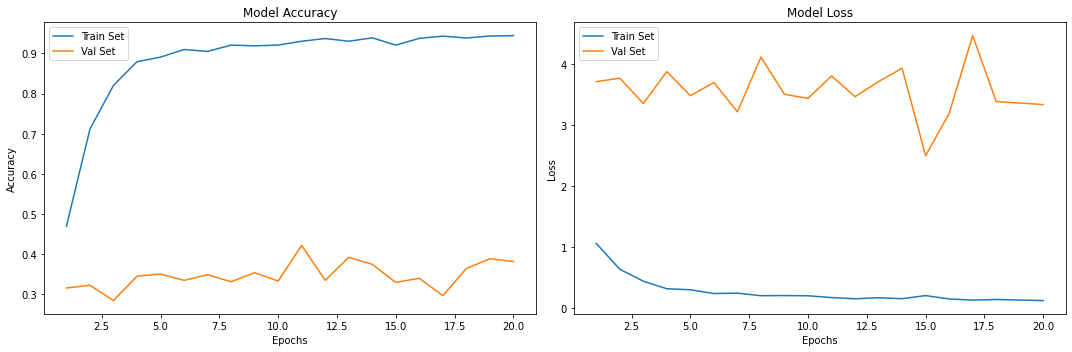

In [26]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## VGG16 Model

In [27]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(128,128,3)
)

In [28]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 32772     
                                                                 
Total params: 14,747,460
Trainable params: 32,772
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./vgg_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [30]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 0.5776 - accuracy: 0.7868
Epoch 1: val_accuracy improved from -inf to 0.31597, saving model to ./vgg_model.hdf5
75/75 [==============================] - 21s 257ms/step - loss: 0.5776 - accuracy: 0.7868 - val_loss: 2.0139 - val_accuracy: 0.3160
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9052
Epoch 2: val_accuracy improved from 0.31597 to 0.32118, saving model to ./vgg_model.hdf5
75/75 [==============================] - 19s 248ms/step - loss: 0.2643 - accuracy: 0.9052 - val_loss: 2.0362 - val_accuracy: 0.3212
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.2019 - accuracy: 0.9258
Epoch 3: val_accuracy improved from 0.32118 to 0.34028, saving model to ./vgg_model.hdf5
75/75 [==============================] - 19s 257ms/step - loss: 0.2019 - accuracy: 0.9258 - val_loss: 1.9411 - val_accuracy: 0.3403
Epoch 4/20
75/75 [==============================] - ETA: 0

In [31]:
# Loading the Best Fit Model 
model = load_model("./vgg_model.hdf5")

In [32]:
# Checking the Accuracy of the Model 
accuracy_vgg = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 84.49612259864807 %


In [33]:
vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

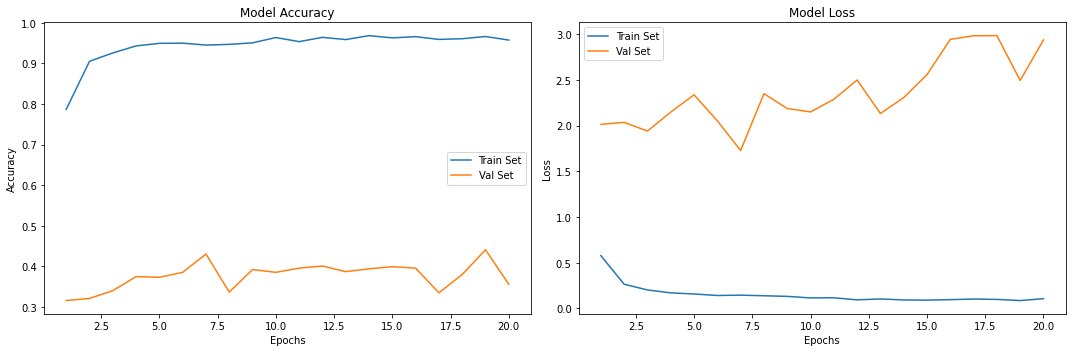

In [34]:
# Plot model performance
acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Inceptionv3 Model

In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (128, 128, 3), 
                         include_top = False, 
                         weights = 'imagenet')

In [36]:
for layer in base_model.layers:
    layer.trainable = False

In [37]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 4 node for classification output
x = layers.Dense(4, activation='sigmoid')(x)

model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [38]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./incep_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [39]:
# Fitting the Model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 1.8064 - accuracy: 0.7008
Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to ./incep_model.hdf5
75/75 [==============================] - 25s 276ms/step - loss: 1.8064 - accuracy: 0.7008 - val_loss: 3.3357 - val_accuracy: 0.3125
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.8310
Epoch 2: val_accuracy improved from 0.31250 to 0.34201, saving model to ./incep_model.hdf5
75/75 [==============================] - 19s 251ms/step - loss: 0.5243 - accuracy: 0.8310 - val_loss: 3.6456 - val_accuracy: 0.3420
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.4271 - accuracy: 0.8656
Epoch 3: val_accuracy did not improve from 0.34201
75/75 [==============================] - 19s 260ms/step - loss: 0.4271 - accuracy: 0.8656 - val_loss: 4.4140 - val_accuracy: 0.3229
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.884

In [40]:
# Loading the Best Fit Model 
model = load_model("./incep_model.hdf5")

In [41]:
# Checking the Accuracy of the Model 
accuracy_incep = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_incep*100} %")

The accuracy of the model is = 65.89147448539734 %


In [42]:
incep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

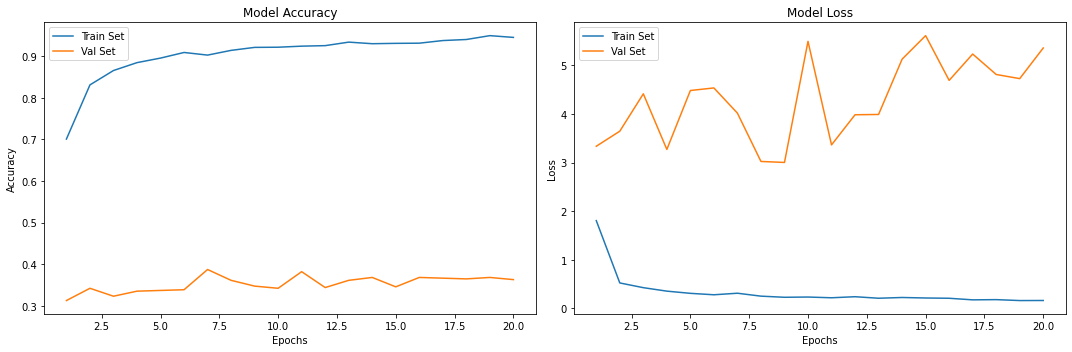

In [43]:
# Plot model performance
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs_range = range(1, len(incep.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## ResNet50 Model

In [44]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(128, 128,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')

In [45]:
for layer in base_model.layers:
    layer.trainable = False

In [46]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [47]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])

In [48]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./resnet_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [49]:
# Fitting the Model
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 1.7092 - accuracy: 0.2899
Epoch 1: val_accuracy improved from -inf to 0.28819, saving model to ./resnet_model.hdf5
75/75 [==============================] - 23s 265ms/step - loss: 1.7092 - accuracy: 0.2899 - val_loss: 1.4317 - val_accuracy: 0.2882
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 1.3515 - accuracy: 0.3430
Epoch 2: val_accuracy did not improve from 0.28819
75/75 [==============================] - 19s 247ms/step - loss: 1.3515 - accuracy: 0.3430 - val_loss: 1.3943 - val_accuracy: 0.2865
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 1.3266 - accuracy: 0.3574
Epoch 3: val_accuracy improved from 0.28819 to 0.28993, saving model to ./resnet_model.hdf5
75/75 [==============================] - 19s 253ms/step - loss: 1.3266 - accuracy: 0.3574 - val_loss: 1.4001 - val_accuracy: 0.2899
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 1.2998 - accuracy: 0.3

In [50]:
# Loading the Best Fit Model 
model = load_model("./resnet_model.hdf5")

In [51]:
# Checking the Accuracy of the Model 
accuracy_resnet = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_resnet*100} %")

The accuracy of the model is = 22.480620443820953 %


In [52]:
resnet.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

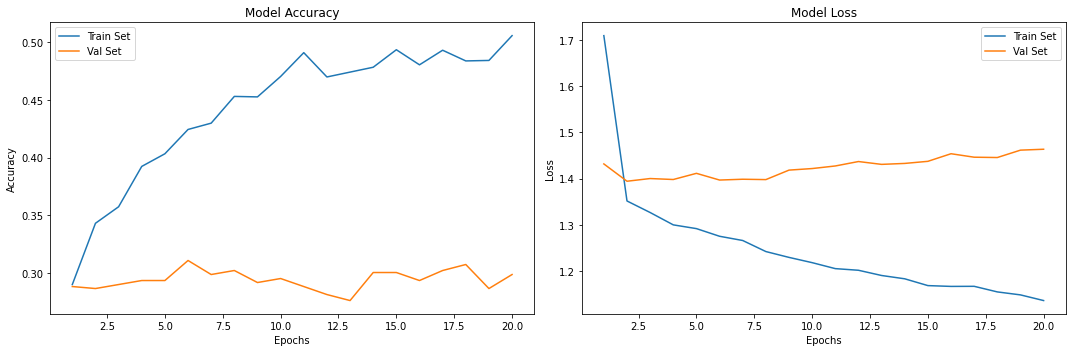

In [53]:
# Plot model performance
acc = resnet.history['accuracy']
val_acc = resnet.history['val_accuracy']
loss = resnet.history['loss']
val_loss = resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Comparison

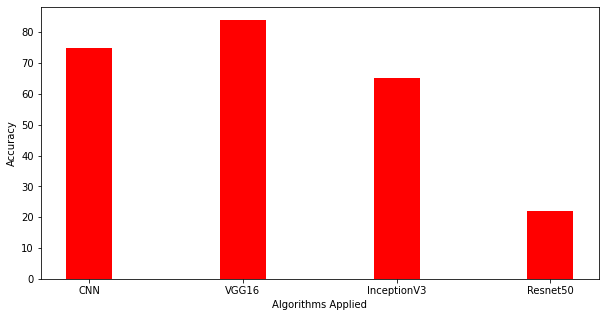

In [54]:
#@title
algos = ['CNN', 'VGG16', 'InceptionV3', 'Resnet50']
accuracy = [accuracy_cnn, accuracy_vgg, accuracy_incep, accuracy_resnet]
accuracy = np.floor([i * 100 for i in accuracy])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, accuracy, color ='red', width = 0.3)
 
plt.xlabel("Algorithms Applied")
plt.ylabel("Accuracy")
plt.show()

### Predictions

In [55]:
#@title
def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    # Loading Image
    img = image.load_img(path, target_size=(128,128))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(_model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

In [56]:
#@title
path = "/content/drive/MyDrive/RajaProject/Lung_CT/2.jpg"
chestScanPrediction(path,model1)

1/1 [==============================] - 0s 309ms/step
Normal


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
prediction = []
original = []
images = []

for i in range(len(os.listdir(test_path))):
  for item in os.listdir(os.path.join(test_path,str(i))):
    x=os.path.join(test_path,str(i),item)
    
    img= cv2.imread(x)
    img = cv2.resize(img,(128,128))
    images.append(img)
    img = img / 255
    img = img.reshape(-1,128,128,3)
    predict = model1.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 [==============================] - 0s 17ms/step


In [58]:
# labels Translator 
label_names = {0 : 'ade', 1 : 'carc' , 2: 'normal', 3 : 'squa'}

In [59]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7054263565891473


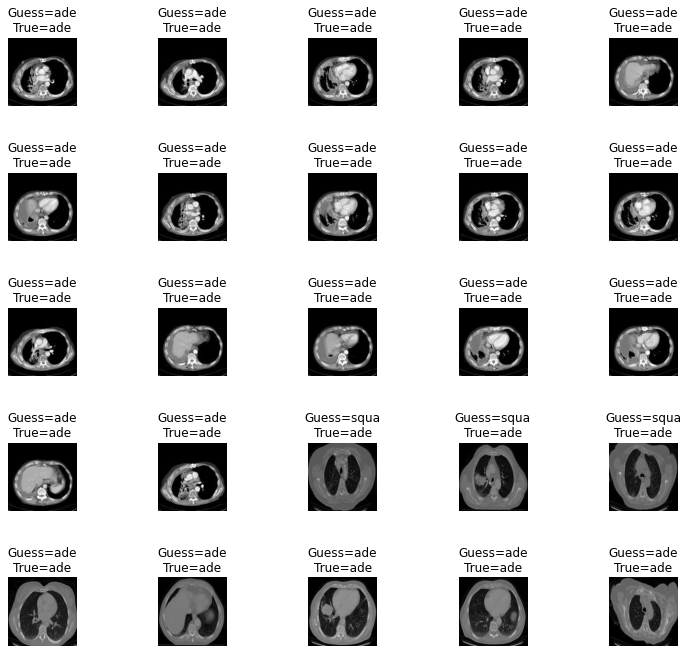

In [60]:
L = 5
W = 5
import random

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    
    axes[i].imshow(images[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')
    

plt.subplots_adjust(wspace = 1.2) 

In [61]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71        30
           1       0.64      0.62      0.63        26
           2       1.00      0.70      0.82        53
           3       0.50      0.60      0.55        20

    accuracy                           0.71       129
   macro avg       0.69      0.70      0.68       129
weighted avg       0.76      0.71      0.71       129



Text(0.5, 1.0, 'Confusion_matrix')

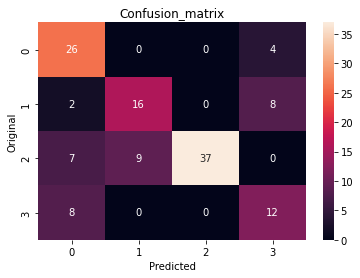

In [62]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')